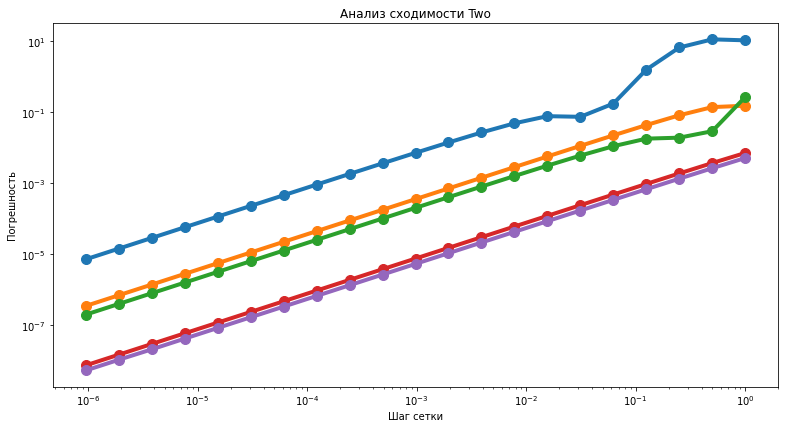

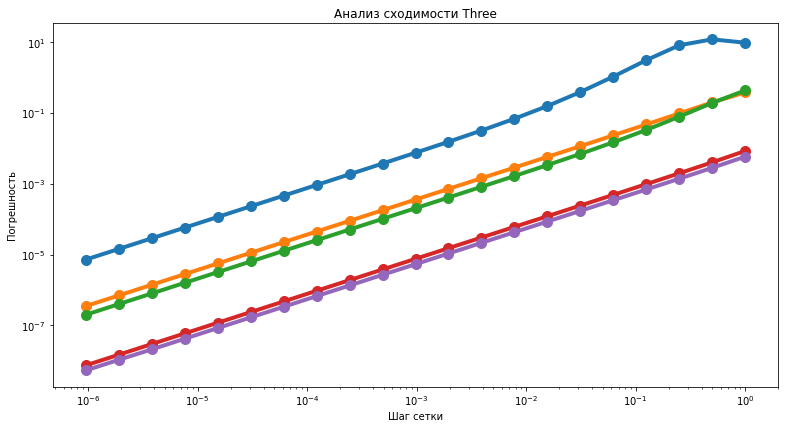

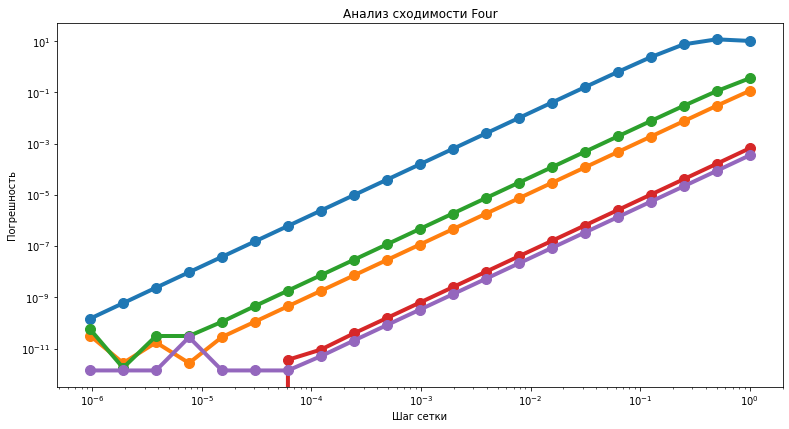

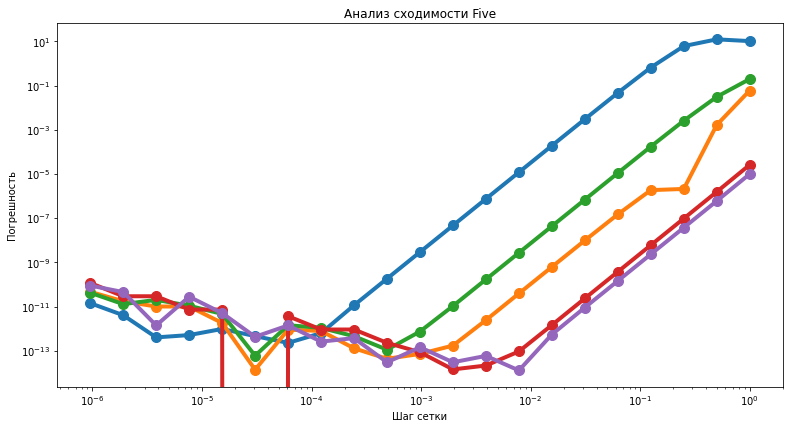

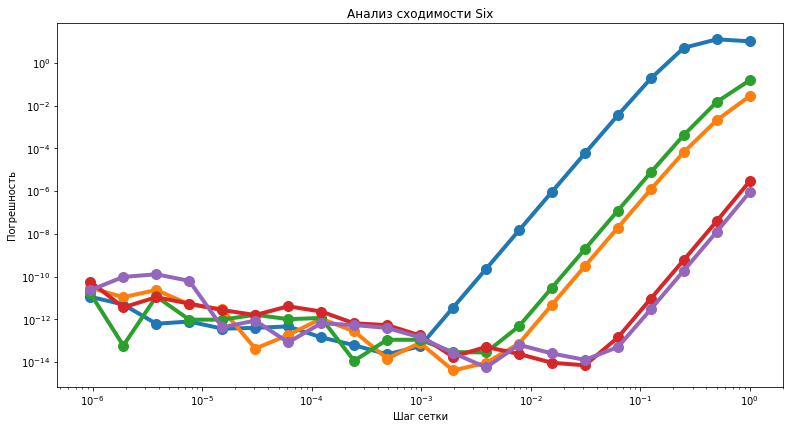

In [37]:
#Джураева Линара, 731, задача 2
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

class DerivativeNum:
    
    def __init__(self, f):
        self.f = f
        self._N = 7
        self.SetMultiplier() 
    
    def SetMultiplier(self):
        raise NotImplementedError

    def Seth(self, h):
        self._h = float(h)
        self._Points = np.array([(self._h) * (i) for i in range(int(-(self._N - 1)/2),  int((self._N - 1)/2) + 1)])

                           
    def __call__(self, x):
        TruePoints = self._Points + float(x)                       
        q = 0.
        for i in range(self._N):
            q += self._Multiplier[i]*self.f(TruePoints[i])
        q /= self._h
        
        return q


class Two(DerivativeNum):
    def SetMultiplier(self):
        self._Multiplier = np.zeros(self._N)
        self._Multiplier[3] = -1.
        self._Multiplier[4] = 1.

class Three(DerivativeNum):
    def SetMultiplier(self):
        self._Multiplier = np.zeros(self._N)
        self._Multiplier[2] = -1.
        self._Multiplier[3] = 1.

class Four(DerivativeNum):
    def SetMultiplier(self):
        self._Multiplier = np.zeros(self._N )
        self._Multiplier[2] = -1./2
        self._Multiplier[4] = 1./2

class Five(DerivativeNum):
    def SetMultiplier(self):
        self._Multiplier = np.zeros(self._N)
        self._Multiplier[1] = 1./12
        self._Multiplier[2] = -2./3
        self._Multiplier[4] = 2./3
        self._Multiplier[5] = -1./12
  
class Six(DerivativeNum):
    def SetMultiplier(self):
        self._Multiplier = np.zeros(self._N)
        self._Multiplier[0] = -1./60
        self._Multiplier[1] = 3./20
        self._Multiplier[2] = -3./4
        self._Multiplier[4] = 3./4
        self._Multiplier[5] = -3./20
        self._Multiplier[6] = 1./60


xSym = smp.Symbol('x')

functionsSym = [smp.sin(xSym **2), smp.cos(smp.sin(xSym)), smp.exp(smp.sin(smp.cos(xSym))), smp.log(xSym + 3), smp.sqrt(xSym + 3)]
functions = [smp.lambdify(xSym, f) for f in functionsSym]



derivativesAnalyticalSym = [smp.diff(f, xSym) for f in functionsSym]
derivativesAnalytical = [smp.lambdify(xSym, f) \
                        for f in derivativesAnalyticalSym]


steps = [2**(-n) for n in range(0, 21)]

figureSizeConst = (13, 6.7)
plt.figure(figsize=figureSizeConst)
plt.title('Анализ сходимости Two')


for f, derivativeAnalytical in zip(functions, derivativesAnalytical):
    
        errors = []
        for h in steps:
            derivativeNum = Two(f)
            derivativeNum.Seth(h)
            error = m.fabs(derivativeNum(5.) - derivativeAnalytical(5.))
            errors.append(error)
        
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
        

plt.xlabel('Шаг сетки')
plt.ylabel('Погрешность')
plt.show()

plt.figure(figsize=figureSizeConst)
plt.title('Анализ сходимости Three')


for f, derivativeAnalytical in zip(functions, derivativesAnalytical):
    
        errors = []
        for h in steps:
            derivativeNum = Three(f)
            derivativeNum.Seth(h)
            error = m.fabs(derivativeNum(5.) - derivativeAnalytical(5.))
            errors.append(error)
        
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
        

plt.xlabel('Шаг сетки')
plt.ylabel('Погрешность')
plt.show()

plt.figure(figsize=figureSizeConst)
plt.title('Анализ сходимости Four')


for f, derivativeAnalytical in zip(functions, derivativesAnalytical):
    
        errors = []
        for h in steps:
            derivativeNum = Four(f)
            derivativeNum.Seth(h)
            error = m.fabs(derivativeNum(5.) - derivativeAnalytical(5.))
            errors.append(error)
        
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
        

plt.xlabel('Шаг сетки')
plt.ylabel('Погрешность')
plt.show()

plt.figure(figsize=figureSizeConst)
plt.title('Анализ сходимости Five')


for f, derivativeAnalytical in zip(functions, derivativesAnalytical):
    
        errors = []
        for h in steps:
            derivativeNum = Five(f)
            derivativeNum.Seth(h)
            error = m.fabs(derivativeNum(5.) - derivativeAnalytical(5.))
            errors.append(error)
        
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
        

plt.xlabel('Шаг сетки')
plt.ylabel('Погрешность')
plt.show()

plt.figure(figsize=figureSizeConst)
plt.title('Анализ сходимости Six')


for f, derivativeAnalytical in zip(functions, derivativesAnalytical):
    
        errors = []
        for h in steps:
            derivativeNum = Six(f)
            derivativeNum.Seth(h)
            error = m.fabs(derivativeNum(5.) - derivativeAnalytical(5.))
            errors.append(error)
        
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
        

plt.xlabel('Шаг сетки')
plt.ylabel('Погрешность')
plt.show()